In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import seaborn as sns
import skimage.io
import copy
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [2]:
cell_heights = pd.read_csv("cell_heights.csv")

In [3]:
cell_heights['ext_diff'] = cell_heights['live_height_ext_pnts'] - cell_heights['lamin_height_ext_pnts']

In [4]:
cell_heights_microns = copy.deepcopy(cell_heights)
cell_heights_microns.set_index("cell", inplace=True)
cell_heights_microns = cell_heights_microns /4
cell_heights_microns.reset_index(inplace=True)

In [5]:
cell_heights_microns.sort_values("ext_diff").reset_index(drop=True)

,cell,Unnamed: 0,live_min,live_max,lamin_min,lamin_max,live_height_10_90_CH,live_height_ext_pnts,lamin_height_10_90_CH,lamin_height_ext_pnts,ext_diff
0,fov2_rep1_live2_its1_70,0.0,1.026295,4.883657,0.750,5.750,3.076240,3.857362,4.375,5.000,-1.142638
1,fov2_rep1_live4_its1_55,0.0,1.159455,4.672985,0.750,5.250,3.077132,3.513529,3.500,4.500,-0.986471
2,fov2_rep1_live6_its1_40,0.0,1.090137,4.897154,0.875,5.500,3.102370,3.807018,3.625,4.625,-0.817982
3,fov2_rep1_live3_its1_72,0.0,0.798610,4.499423,0.750,5.125,3.091038,3.700813,3.500,4.375,-0.674187
4,fov1_rep1_live6_its1_63,0.0,1.146986,5.009868,1.000,5.500,2.970897,3.862883,3.375,4.500,-0.637117
5,fov7_rep2_live1_its1_21,0.0,1.039469,4.973513,2.125,6.625,3.094097,3.934044,4.125,4.500,-0.565956
6,fov8_rep2_live3_its1_42,0.0,1.500000,5.136849,2.625,6.750,3.186587,3.636849,3.500,4.125,-0.488151
7,fov10_rep2_live3_its1_68,0.0,1.938985,5.240700,2.250,6.000,2.532832,3.301715,2.750,3.750,-0.448285
8,fov3_rep2_live4_its1_56,0.0,0.753618,3.930401,1.625,5.250,2.661016,3.176783,3.000,3.625,-0.448217
9,fov2_rep2_live6_its1_23,0.0,1.374041,5.000800,3.000,7.000,2.981440,3.626759,3.500,4.000,-0.373241


In [6]:
def plot_cell_b4_after(cell_name, ax_live, ax_its1, lw=2):
    
    fixed_lamin_stack_path = "cropped_fix_its1_padded/fixits1_" + cell_name + ".tif"
    live_nuc_pore_stack_path = "cropped_live_nuc_pore_padded/live_" + cell_name +".tif"
    
    fixed_lamin_stack = skimage.io.imread(fixed_lamin_stack_path)
    live_stack = skimage.io.imread(live_nuc_pore_stack_path)

    # clip hot pixels
    live_stack[live_stack > 1000] = 1000
    fixed_lamin_stack[fixed_lamin_stack > 4000] = 4000

    live_bottom = int(np.floor(cell_heights.loc[cell_heights.cell == cell_name].live_min).iloc[0])
    live_top = int(np.round(cell_heights.loc[cell_heights.cell == cell_name].live_max).iloc[0])

    its1_bottom = int(np.floor(cell_heights.loc[cell_heights.cell == cell_name].lamin_min).iloc[0])
    its1_top = int(np.round(cell_heights.loc[cell_heights.cell == cell_name].lamin_max).iloc[0])

    bottom_padding = np.min([live_bottom, its1_bottom, 4])
    live_crop_bottom = live_bottom - bottom_padding
    its1_crop_bottom = its1_bottom - bottom_padding

    top_padding = np.min([np.shape(live_stack)[0] - live_top, np.shape(fixed_lamin_stack)[0] - its1_top, 4])
    its1_crop_top = its1_top + top_padding
    live_crop_top = live_top + top_padding

    ax_its1.imshow(np.sum(fixed_lamin_stack,axis=2)[its1_crop_bottom:its1_crop_top,:], aspect='auto', interpolation='none', origin='lower')
    ax_live.imshow(np.sum(live_stack,axis=2)[live_crop_bottom:live_crop_top,:], aspect='auto', interpolation='none', origin='lower')

    ax_its1.set_title("Post mock seqFISH protocol fixed lamin stain")
    ax_live.set_title("Live nuclear-pore GFP")
    
    lbls = []
    for z in range(live_crop_top - live_crop_bottom):
        if z % 4 == 0:
            lbls.append(str(int(z/4)))
        else:
            lbls.append('')
    
     
    ax_its1.set_yticks(range(live_crop_top - live_crop_bottom), labels=lbls)
    ax_live.set_yticks(range(live_crop_top - live_crop_bottom), labels= lbls)
    ax_live.yaxis.set_major_locator(MultipleLocator(4))
    ax_live.yaxis.set_minor_locator(MultipleLocator(1))
    ax_its1.yaxis.set_major_locator(MultipleLocator(4))
    ax_its1.yaxis.set_minor_locator(MultipleLocator(1))
    
    
    majx = []
    lbls = []
    minx = []
    for x in range(1,np.shape(fixed_lamin_stack)[1]):
        rem5 = (x * 0.103) % 5
        rem1 = (x * 0.103) % 1
        if (rem5 < 0.103/2) or rem5 > (5- 0.103/2):
            majx.append(x)
            lbls.append(int(np.round(x*0.103)))
        elif (rem1 < 0.103/2) or rem1 > (1- 0.103/2):
            minx.append(x)

    ax_live.set_xticks(majx, labels=lbls)
    ax_its1.set_xticks(majx, labels=lbls)
    ax_live.set_xticks(minx, minor=True)
    ax_its1.set_xticks(minx, minor=True)
    
    ax_its1.set_ylabel("z ($\mu m$)")
    ax_live.set_ylabel("z ($\mu m$)")
    
    ax_live.set_xlabel("x ($\mu m$)")
    ax_its1.set_xlabel("x ($\mu m$)")
    
    ax_live.plot([0, np.shape(live_stack)[1]-1], [cell_heights.loc[cell_heights.cell == cell_name, "live_min"]-live_crop_bottom]*2, 'r', linewidth =lw)
    ax_live.plot([0, np.shape(live_stack)[1]-1], [cell_heights.loc[cell_heights.cell == cell_name, "live_max"]-live_crop_bottom]*2, 'r', linewidth =lw)
    
    ax_its1.plot([0, np.shape(fixed_lamin_stack)[1]-1], [cell_heights.loc[cell_heights.cell == cell_name, "lamin_min"] - its1_crop_bottom]*2, 'r', linewidth =lw)
    ax_its1.plot([0, np.shape(fixed_lamin_stack)[1]-1], [cell_heights.loc[cell_heights.cell == cell_name, "lamin_max"] - its1_crop_bottom]*2, 'r', linewidth =lw)



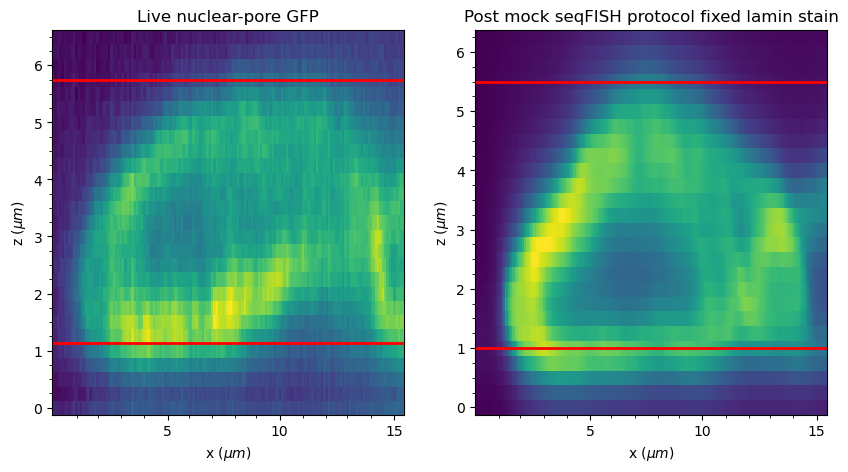

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_cell_b4_after('fov2_rep2_live7_its1_34', ax[0], ax[1])
plt.show()


In [8]:
rand_cell_names = ['fov9_rep2_live2_its1_29','fov2_rep2_live7_its1_34', 'fov2_rep2_live4_its1_25', 'fov3_rep2_live3_its1_45', 'fov2_rep2_live1_its1_43',
 'fov6_rep2_live3_its1_27', 'fov1_rep1_live2_its1_26', 'fov2_rep1_live2_its1_70', 'fov8_rep2_live9_its1_14', 'fov8_rep2_live8_its1_48']

In [9]:
cell_heights_microns.set_index("cell", inplace=True)
rand_cells = cell_heights_microns.loc[rand_cell_names]
rand_cells.reset_index(inplace=True)

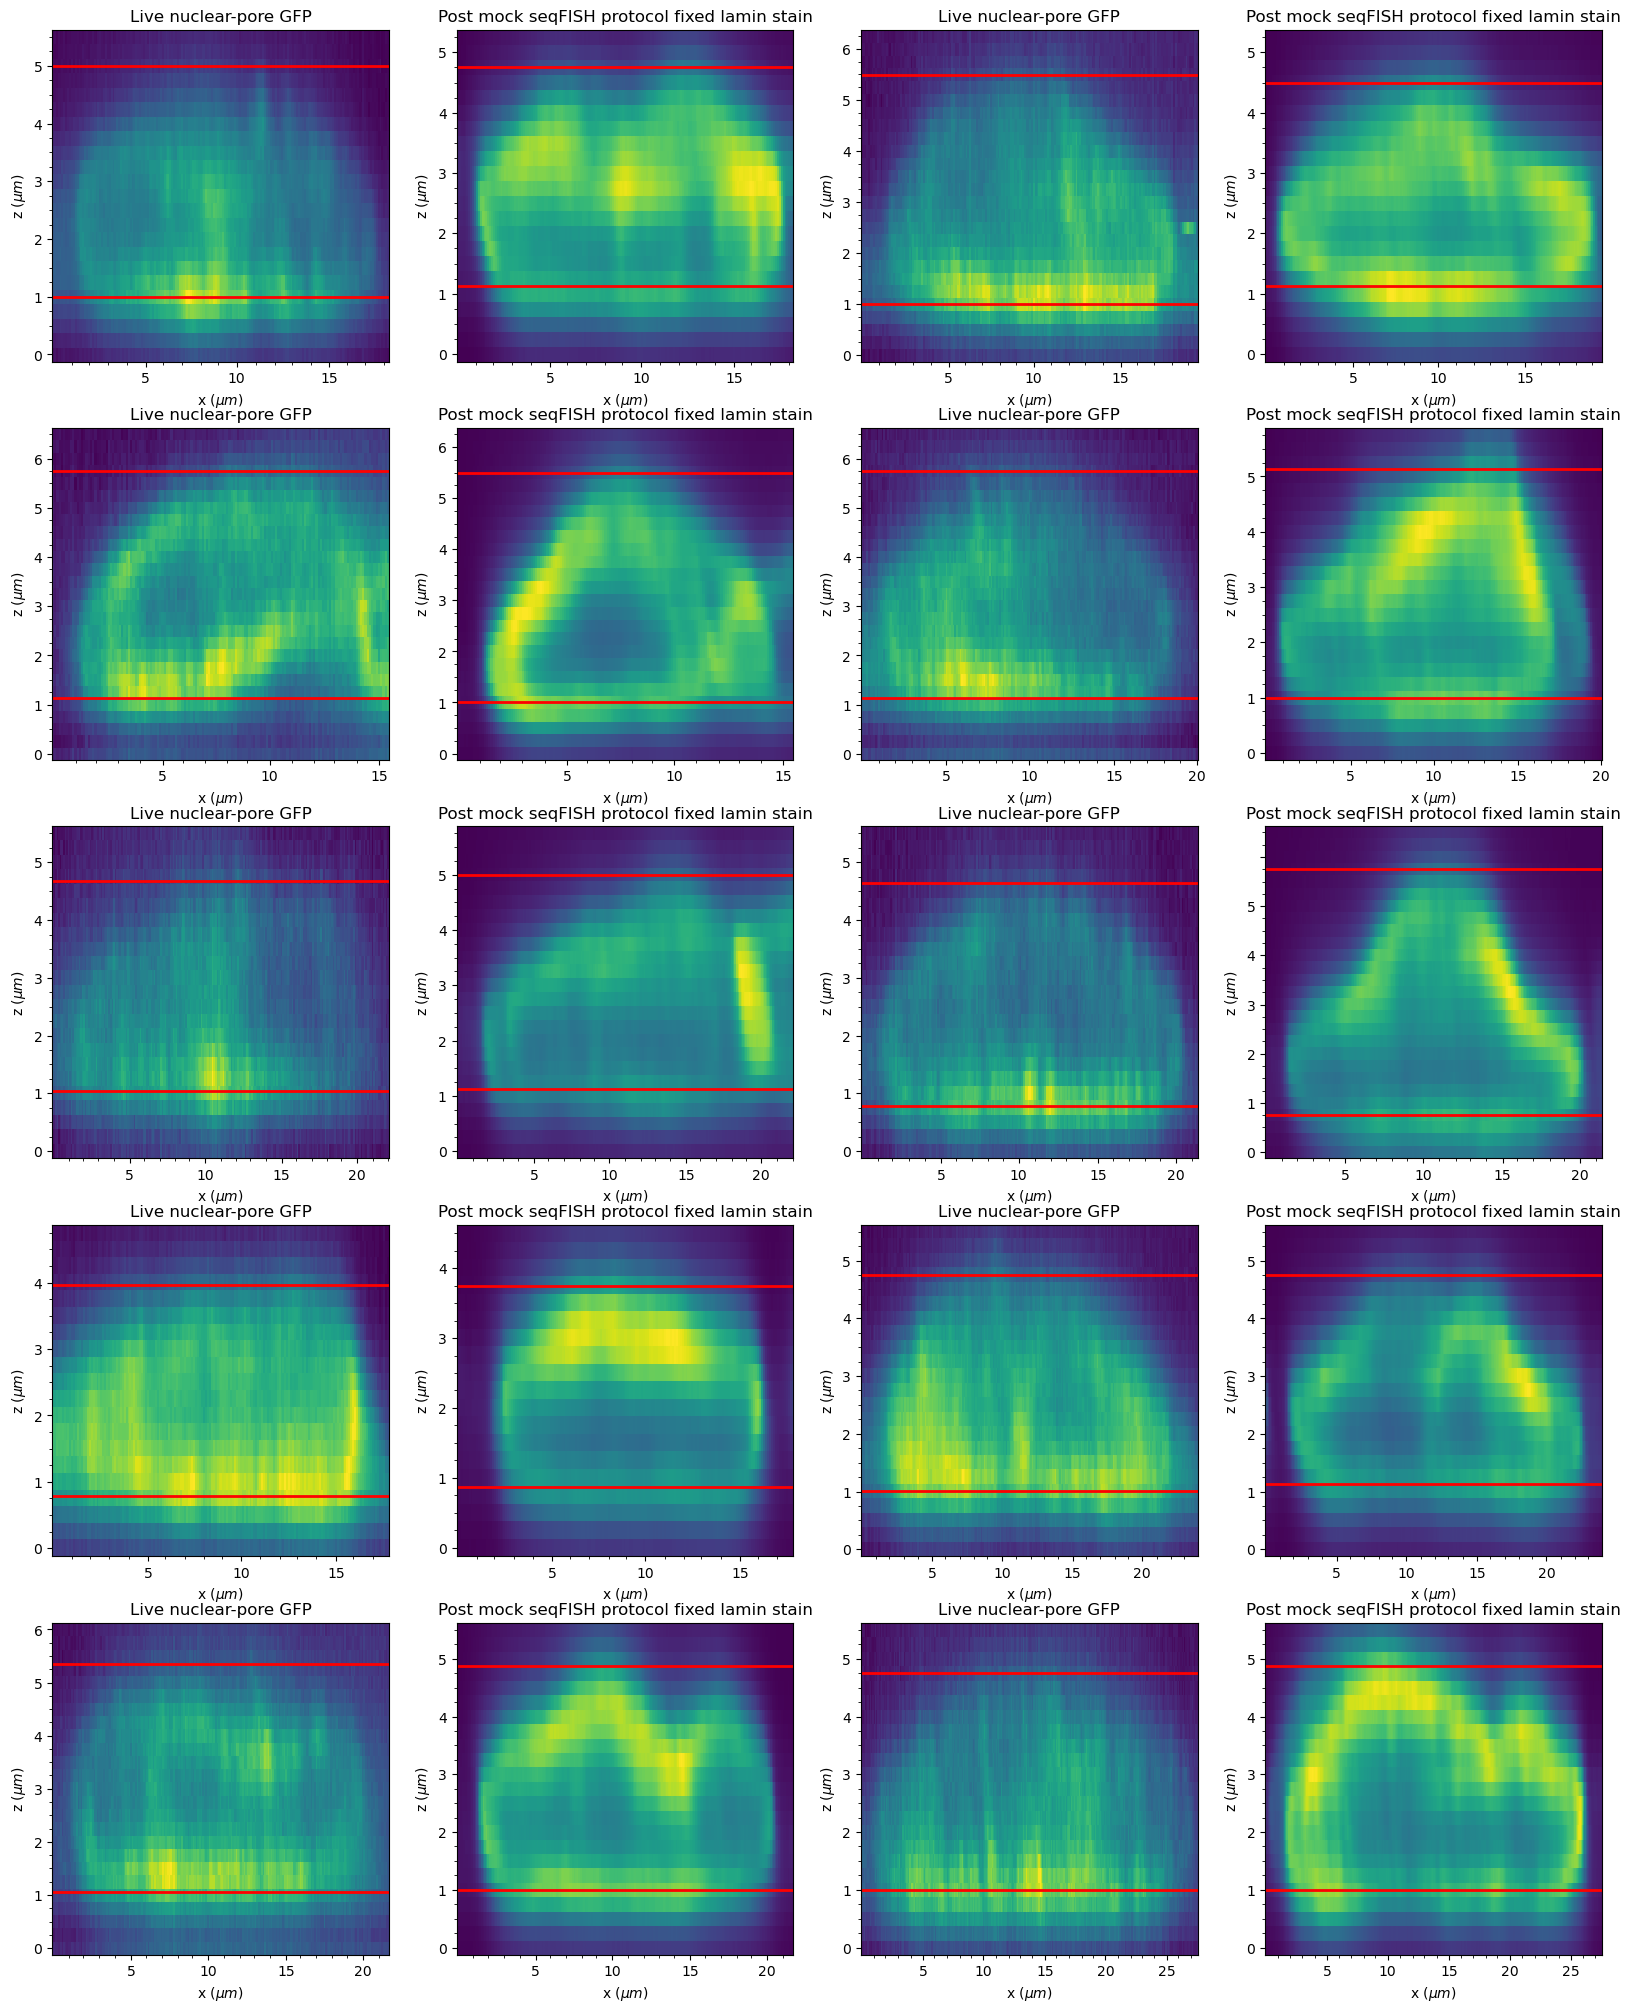

In [10]:
fig, ax = plt.subplots(5,4, figsize=(20,25))

# The first run of the notebook randomly chose 10 cells to show in the figure. In this version, the same randomly chosen cells are hard coded.
# the following line of code can be uncommented to randomly choose another 10 cells.

# rand_cells = cell_heights_microns.sample(10)

rand_cells.reset_index(inplace=True, drop=True)

for i in range(10):
    row = i % 5
    col = int(np.floor(i/5))
    
    plot_cell_b4_after(rand_cells.loc[i, 'cell'], ax[row,2*col], ax[row,2*col+1])

plt.savefig("cell_panel.svg")

In [11]:
rand_cells

,cell,Unnamed: 0,live_min,live_max,lamin_min,lamin_max,live_height_10_90_CH,live_height_ext_pnts,lamin_height_10_90_CH,lamin_height_ext_pnts,ext_diff
0,fov9_rep2_live2_its1_29,0.0,1.500500,5.491856,2.125,5.750,3.448415,3.991356,3.000,3.625,0.366356
1,fov2_rep2_live7_its1_34,0.0,1.127859,5.749895,2.750,7.250,4.019696,4.622036,3.625,4.500,0.122036
2,fov2_rep2_live4_its1_25,0.0,1.287237,4.928313,2.875,6.750,3.102275,3.641076,3.250,3.875,-0.233924
3,fov3_rep2_live3_its1_45,0.0,0.785659,3.959316,1.625,4.500,2.332749,3.173656,2.250,2.875,0.298656
4,fov2_rep2_live1_its1_43,0.0,1.047486,5.345015,2.750,6.625,3.269712,4.297529,2.875,3.875,0.422529
5,fov6_rep2_live3_its1_27,0.0,1.500556,5.990410,2.625,6.000,4.030450,4.489854,2.125,3.375,1.114854
6,fov1_rep1_live2_its1_26,0.0,1.124103,5.747357,1.000,5.125,4.129412,4.623253,3.375,4.125,0.498253
7,fov2_rep1_live2_its1_70,0.0,1.026295,4.883657,0.750,5.750,3.076240,3.857362,4.375,5.000,-1.142638
8,fov8_rep2_live9_its1_14,0.0,1.500814,5.255980,2.875,6.500,3.285124,3.755166,2.625,3.625,0.130166
9,fov8_rep2_live8_its1_48,0.0,1.500000,5.250352,2.750,6.625,3.015861,3.750352,2.875,3.875,-0.124648
